Sources:

https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from google.colab import drive
import pickle

drive.mount('/content/drive/')

def load_pickle(path):
    with open(path, 'rb') as f:
        file = pickle.load(f)
        print ('Loaded %s..' %path)
        return file

dataset_directory = '/content/drive/My Drive/Colab Notebooks/tweet-emotion-detection/language_dataset'

emotions = ['anger', 'fear', 'joy', 'sadness']

tweets_train = np.load(join(dataset_directory, 'text_train_tweets.npy'))
labels_train = np.load(join(dataset_directory, 'text_train_labels.npy'))
vocabulary = load_pickle(join(dataset_directory, 'text_word_to_idx.pkl'))

tweets_val = np.load(join(dataset_directory, 'text_val_tweets.npy'))
labels_val = np.load(join(dataset_directory, 'text_val_labels.npy'))

tweets_test_public = np.load(join(dataset_directory, 'text_test_public_tweets_rand.npy'))

print(len(vocabulary))
idx_to_word = {i: w for w, i in vocabulary.items()}
for i in range(7):
  print(i, idx_to_word[i])

sample = 1  ## YOU CAN TRY OUT OTHER TWEETS

print('sample tweet, stored form:')
print(tweets_train[sample])
print(labels_train[sample])

print('sample tweet, readable form:')
decode = []
#tweet_string
for i in range(50):
  decode.append(idx_to_word[tweets_train[sample][i]])
print(decode)
print(emotions[labels_train[sample]])

print("\nPossible words for each feature:", len(vocabulary))
print("Training data X:", tweets_train.shape)
print("Training data y:", labels_train.shape)
print("Val data X:", tweets_val.shape)
print("Val data y:", labels_val.shape)
print("Test data X:", tweets_test_public.shape)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Loaded /content/drive/My Drive/Colab Notebooks/tweet-emotion-detection/language_dataset/text_word_to_idx.pkl..
13978
0 <NULL>
1 <START>
2 <END>
3 it
4 makes
5 me
6 so
sample tweet, stored form:
[ 1 23 24 20 25 19 26 27 28  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
0
sample tweet, readable form:
['<START>', 'lol', 'adam', 'the', 'bull', 'with', 'his', 'fake', 'outrage', '<

In [0]:
# create a test submission file with all tweets predicted as 'anger' (1)
y_test_predict_np = np.c_[np.array(range(1, 4065)).astype(int), np.ones(4064).astype(int)]
y_test_predict = pd.DataFrame(y_test_predict_np, columns=["ID", "Prediction"])
y_test_predict.to_csv(join(dataset_directory, "42592380-conv.csv"), index=False)

### Data Exploration

How many times does each emotion appear in the training set? Are the classes well balanced?


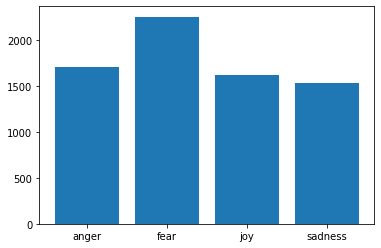

In [0]:
emotion_nums, counts = np.unique(labels_train, return_counts=True)
plt.bar(emotions, counts);

# Answer: the classes are well balanced

Are the tweets for different emotions of similar length on average?

In [0]:
# # Count number of words per tweet. The tweets include items that are not words like <START>, <END> and <NULL>. Don't
# # include these in the count.
# tweets_train_wordcount = []
# for tweet in tweets_train:
#   word_count = 0
#   for vocab_idx in tweet:
#     word = idx_to_word[vocab_idx]
#     if word not in ['<START>', '<END>', '<NULL>']:
#       word_count += 1
#   tweets_train_wordcount.append(word_count)
# tweets_train_wordcount = np.array(tweets_train_wordcount)

# # plot histograms of tweet word counts by emotion
# fig, ax = plt.subplots(2, 2, figsize=(12,8));
# fig.subplots_adjust(hspace=0.2, wspace=0.2);

# for i in range(0, 4):
#   emotion_counts = tweets_train_wordcount[np.array(labels_train==i)]
#   ax[int(i/2), i - 2*int(i/2)].hist(emotion_counts);
#   ax[int(i/2), i - 2*int(i/2)].set_title(emotions[i]);
#   ax[int(i/2), i - 2*int(i/2)].axvline(x=np.mean(emotion_counts), color='red')
#   ax[int(i/2), i - 2*int(i/2)].legend(['Mean Word Count']);
#   ax[int(i/2), i - 2*int(i/2)].grid(True);

# # Answer: yes, the distribution of tweet lengths and the mean tweet length is similar for the 4 emotions

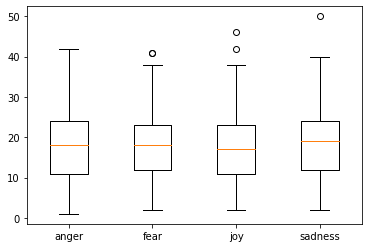

In [0]:
tweets_train_wordcount

anger = tweets_train_wordcount[np.array(labels_train==0)]
fear = tweets_train_wordcount[np.array(labels_train==1)]
joy = tweets_train_wordcount[np.array(labels_train==2)]
sadness = tweets_train_wordcount[np.array(labels_train==3)]

plt.boxplot([anger, fear, joy, sadness]);
plt.xticks([1, 2, 3, 4], emotions);

In [0]:
# Word counts, number of unique words, how many words for top 50% etc...

# Slide 27 of 7-1 lec notes has a good way of plotting word freqs

## Data pre-processing:

Remove >2 of a letter, correct spelling, fix slang

In [0]:
# import re

# def reduce_lengthening(text):
#     pattern = re.compile(r"(.)\1{2,}")
#     return pattern.sub(r"\1\1", text)

# word = "aweeeeesomeeee"
# word = reduce_lengthening(word)
# # print(word)

In [0]:
emotion_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tweet-emotion-detection/language_dataset/word_emotions.csv')
emotion_words = list(emotion_df['English (en)'])

De-emoji, remove hashtags, stop words, punctuation and lemmatize the tweets:

In [2]:
# Sources - from the uni notes:

!pip install emoji --upgrade
import emoji

import string
from collections import defaultdict

import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'averaged_perceptron_tagger'])
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet as wn

tag_map = defaultdict(lambda : wn.NOUN); tag_map['J'] = wn.ADJ; tag_map['V'] = wn.VERB; tag_map['R'] = wn.ADV

def normalise_tweets(tweets):
  #tweet_tokenizer = TweetTokenizer(reduce_len=True)
  lemmatizer = WordNetLemmatizer()
  stop_punct = stopwords.words('english') + list(string.punctuation)
  
  normalised_tweets = []
  for tweet in tweets:

    # Step 1 - the tweets are currently indexes. this loop converts them to a list of words without the '<START>', '<END>', '<NULL>'
    # and '<user>' words which are useless. It also uses word_tokenize which will split off hashtags - e.g. '#tag' becomes '# tag'. It
    # also uses the emoji package to convert emoji pictures into words as these could be valuable.
    tweet_words = []
    for vocab_idx in tweet:
      word = emoji.demojize(idx_to_word[vocab_idx])
      if word == '<END>': break
      if word not in ['<START>', '<NULL>', '<user>']:
        tweet_words += word_tokenize(word) # word_tokenize splits off the hashtags
    
    # Step 2 - for the tweets constructed in the first loop, the following loop tags them, then removes punctuation and digtits and
    # short words and thenfinally lemmatizes the word. It re-constructs the tweet as a string.
    normalised_tweet = ""
    for word, tag in pos_tag(tweet_words):
      if word not in stop_punct and not word.isdigit() and len(word) > 2:
        pos = tag_map[tag[0]]
        normalised_tweet = normalised_tweet + lemmatizer.lemmatize(word, pos) + ' '

    normalised_tweets.append(normalised_tweet)
  return normalised_tweets

tweets_train_normalised = normalise_tweets(tweets_train)
tweets_val_normalised = normalise_tweets(tweets_val)
tweets_test_normalised = normalise_tweets(tweets_test_public)
tweets_normalised = tweets_train_normalised + tweets_val_normalised

tweets_train_normalised[1:5]

     |████████████████████████████████| 51kB 4.0MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=3610bcac65aa2aeaf43047fa4b1f94b53f3485ab3f79ce059f71a88de21822db
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['lol adam bull fake outrage ',
 'pass away early morning fast furious styled car crash leave atl strip club rough stuff ',
 'lol wow gon say really haha see chris nah dont even snap anymore dude ',
 'need bento_box sushi date rice_ball spaghetti olive guard date cheese_wedge oncoming_fist medium_light_skin_tone rockys date pizza ']

## Feature engineering:

Vectorise the words using a TF-IDF approach:

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import copy

# there are 7098 tweets in the dataset, hence we need to limit to the features to something reasonable. Start with 3500:
tfidf_train = TfidfVectorizer(ngram_range=(1, 2), max_features = 3500)
X_train = tfidf_train.fit_transform(tweets_train_normalised)
X_val = tfidf_train.transform(tweets_val_normalised)
y_train = labels_train
y_val = labels_val

tfidf_all = copy.deepcopy(tfidf_train)
X = tfidf_all.fit_transform(tweets_normalised)
y = np.concatenate([y_train, y_val])
X_test = tfidf_all.transform(tweets_test_normalised)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X.shape, y.shape, X_test.shape

((7098, 3500),
 (7098,),
 (1460, 3500),
 (1460,),
 (8558, 3500),
 (8558,),
 (4064, 3500))

## Train ML model:

Fit a Naive Bayes classifier to give a baseline for performance measurement on other models:

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()#fit_prior=False)
nb_clf.fit(X_train, y_train)
print(accuracy_score(y_train, nb_clf.predict(X_train)), accuracy_score(y_val, nb_clf.predict(X_val)))

0.9119470273316427 0.43424657534246575


Try several candidate models with default settings to see which might be worth investigating further:

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

models = {"Naive Bayes" : MultinomialNB(),
          "KNN" : KNeighborsClassifier(n_neighbors = 10),
          "Logistic Reg" : LogisticRegression(multi_class='ovr', max_iter=200),
          "Softmax" : LogisticRegression(multi_class='multinomial', solver='lbfgs'),
          "Linear SVM" : LinearSVC(C=10),
          "Non-Linear SVM" : SVC(),
          "Random Forest" : RandomForestClassifier(random_state=0),
          "Grad. Boosting" : GradientBoostingClassifier()}

KNN does not scale well when the number of features is high relative to the number of instances so performs poorly on both training and validation set. The other models perform very well on the training set but not very well on the validation set. Perhaps they are overfitting?


In [6]:
from IPython.display import display

def run_models(models_dict, X_train, y_train, X_val, y_val):
  training_accuracies = []
  validation_accuracies = []
  column_titles = []
  for model_name, model in models_dict.items():
    column_titles.append(model_name)
    model.fit(X_train, y_train)
    training_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    validation_accuracies.append(accuracy_score(y_val, model.predict(X_val)))

  display(pd.DataFrame(np.c_[np.round(training_accuracies, 4), np.round(validation_accuracies, 4)].transpose(),
                       columns=column_titles, index=["Training data", "Validation data"]))

run_models(models, X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Naive Bayes,KNN,Logistic Reg,Softmax,Linear SVM,Non-Linear SVM,Random Forest,Grad. Boosting
Training data,0.9119,0.3726,0.9310,0.9424,0.9704,0.9689,0.9720,0.8367
Validation data,0.4342,0.2836,0.4507,0.4486,0.4384,0.4473,0.4363,0.4205


The linear support vector classifier performed the best of the candidate models so below I perform a grid search to see if the model paramaters (and pre-processing paramaters) can be tweaked to reduce overfitting.

Result: the scores for the 9 models on each of the 5 folds are high for the first 4 folds (>80%) accuracy but only approx 52-53% on the 5th fold. The 5th fold contains only data from the validation set so it seems the low accuracy on the validation set for the initial candidate models (see above cell) is due to reasons other than overfitting.

**NOTE: YOU NEED TO SHUFFLE THE DATA BEFORE DOING THIS BECAUSE IT IS ORDERED BY EMOTION!!!**

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

linearsvm_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('svc', LinearSVC())
])

linearsvm_grid = [{
    'tfidf__ngram_range':[(1,1), (1,2)],
    'tfidf__max_features':[500, 1000, 3500],
    'svc__C':[0.1, 1, 10]
}]

grid_search = GridSearchCV(linearsvm_pipeline, linearsvm_grid, cv=5, scoring='accuracy')
grid_search.fit(tweets_normalised, y)
print("Best model based on CV scores:", grid_search.best_params_)

print("\n Mean accuracy for 9 different paramater combinations")
scores = grid_search.cv_results_
for mean_accuracy, params in zip(scores["mean_test_score"], scores["params"]):
   print(round(mean_accuracy, 2), params)

print("\n")
for i in range(0,5):
  print("Scores for fold", i + 1, "=", np.round(scores["split" + str(i) + "_test_score"], 2))

Best model based on CV scores: {'svc__C': 0.1, 'tfidf__max_features': 3500, 'tfidf__ngram_range': (1, 1)}

 Mean accuracy for 9 different paramater combinations
0.71 {'svc__C': 0.1, 'tfidf__max_features': 500, 'tfidf__ngram_range': (1, 1)}
0.7 {'svc__C': 0.1, 'tfidf__max_features': 500, 'tfidf__ngram_range': (1, 2)}
0.76 {'svc__C': 0.1, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 1)}
0.76 {'svc__C': 0.1, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2)}
0.78 {'svc__C': 0.1, 'tfidf__max_features': 3500, 'tfidf__ngram_range': (1, 1)}
0.78 {'svc__C': 0.1, 'tfidf__max_features': 3500, 'tfidf__ngram_range': (1, 2)}
0.7 {'svc__C': 1, 'tfidf__max_features': 500, 'tfidf__ngram_range': (1, 1)}
0.7 {'svc__C': 1, 'tfidf__max_features': 500, 'tfidf__ngram_range': (1, 2)}
0.75 {'svc__C': 1, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 1)}
0.75 {'svc__C': 1, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2)}
0.78 {'svc__C': 1, 'tfidf__max_features': 3500, 'tfidf

Kaggle returns a score of 60% for the linear svm from above on the test data. The model is trained on the full data (training + validation) so is better than the model on the training set which only achieved 46% accuracy on the validation set:

In [0]:
def create_submission_file(model, X, y, X_test):
  model.fit(X, y)
  y_test_predict_np = np.c_[np.array(range(1, 4065)).astype(int), model.predict(X_test)]
  y_test_predict = pd.DataFrame(y_test_predict_np, columns=["ID", "Prediction"])
  y_test_predict.to_csv(join(dataset_directory, "42592380-conv.csv"), index=False)
  return accuracy_score(y, model.predict(X))

create_submission_file(models['Linear SVM'], X, y, X_test)

0.897172236503856

Perform error analysis on the validation set using a selection of the candidate models to see what is going wrong with the predictions on the validation set:

- All the models have higher accuracy on fear and joy than they do on anger and sadness. Some achieve >60% accuracy on fear at the expense of accuracy on other classes.
- All models have low accuracy (30-40%) on sadness
- In general; angry, fearful and sad tweets are classified as one another quite often but not often classified as joy. In particular, anger and sadness are often classified as fear.
- Joyful tweets are classified as fearful ~25% of the time.

INSERT comment on how the models take very diverse approached but make the SAME ERRORS! No point using a voting classifier.

In [0]:
from sklearn.metrics import confusion_matrix

for model_name in ['Naive Bayes', 'Logistic Reg', 'Linear SVM', 'Random Forest']:
  model = models[model_name]
  y_val_predict = model.predict(X_val)
  cmtrx = confusion_matrix(y_val, y_val_predict)

  cmtrx = cmtrx / cmtrx.sum(axis=1, keepdims=True)
  df = pd.DataFrame(np.round(cmtrx,2), columns=[[model_name] * 4, ["Predicted"] * 4, emotions], 
                       index=[["Actual"] * 4, emotions])
  display(df)
  print("\n")

Naive Bayes                    
                 Predicted                    
                     anger  fear   joy sadness
Actual anger          0.35  0.35  0.13    0.17
       fear           0.18  0.51  0.12    0.18
       joy            0.07  0.26  0.59    0.09
       sadness        0.21  0.38  0.14    0.28

Logistic Reg                    
                  Predicted                    
                      anger  fear   joy sadness
Actual anger           0.33  0.40  0.09    0.18
       fear            0.16  0.58  0.09    0.17
       joy             0.09  0.30  0.55    0.07
       sadness         0.18  0.42  0.11    0.29

Linear SVM                    
                Predicted                    
                    anger  fear   joy sadness
Actual anger         0.33  0.35  0.11    0.21
       fear          0.16  0.50  0.11    0.23
       joy           0.12  0.22  0.55    0.11
       sadness       0.17  0.36  0.13    0.34

Random Forest                    
                   Predicted                    
                       anger  fear   joy sadness
Actual anger            0.33  0.39  0.10    0.18
       fear             0.16  0.55  0.10    0.19
       joy              0.12  0.28  0.53    0.07
       sadness          0.18  0.40  0.13    0.29

Aside from KNN, the models performed similarly on the validation test. Logistic Regression can output the feature weights so the below displays the 10 most informative features for each emotion. Some of the results make sense but some are unexplainable (e.g. 'back' is the most important feature in fearful tweets):

In [7]:
# Put source of where you got this idea
# ALSO maybe show the 10 smallest?

feature_names = np.array(tfidf_train.get_feature_names()).reshape(-1,1)

# make sure the model is the original one
lr_clf = models['Logistic Reg']
lr_clf.fit(X_train, y_train)
weights = np.round(lr_clf.coef_.transpose(), 3)

feature_importances = pd.DataFrame(weights, columns=emotions)
feature_importances.insert(0, 'Feature', feature_names)

for emotion in emotions:
  display(feature_importances.nlargest(10, emotion)[['Feature', emotion]])
  print("\n")

,Feature,anger
2132,offend,6.193
95,angry,5.804
89,anger,5.786
2455,rage,5.619
267,bitter,5.587
2556,revenge,5.453
1119,fume,5.076
2185,outrage,4.816
2930,sting,4.705
2826,snap,4.544


,Feature,fear
993,fear,5.211
2025,nervous,5.182
185,awful,5.173
2062,nightmare,5.088
2727,shake,5.020
356,bully,4.945
3050,terrible,4.901
3057,terrorism,4.873
1450,horrible,4.814
1454,horror,4.753


,Feature,joy
1421,hilarious,6.018
2515,rejoice,5.938
2811,smile,5.809
2166,optimism,5.801
455,cheer,5.774
1344,happy,5.135
1669,laughter,5.126
1194,glee,5.082
1744,lively,4.782
2315,playful,4.417


,Feature,sadness
287,blue,6.317
707,depression,5.925
2833,sober,5.883
704,depress,5.717
2616,sadness,5.644
3261,unhappy,5.500
2611,sad,5.412
657,dark,5.379
2784,sink,5.247
2712,serious,5.111


## Feature selection and representation:

The models are unlikely to be overfitting due to too much flexibility as some of them are reasonably simple models and they have all been run with default settings which are conservative (e.g. by default, the linear svc sets C=1 and logistic regression applies l2 regularisation).

Based on the poor fit of the models on the validation (and test) sets, I think further feature engineering is required. Specifically, the number of features needs to be reduced to include only valuable ones and other methods of representing the features need to be tested.

*1. Delete words that don't appear very often (reduce max_features from 3500 to 1000):*

Result: the accuracies on the training set go down which is not surprising (not by much though). Accuracies on the test set increase slightly for some models. Overall, this method of reducing features made little difference.





In [172]:
tfidf_train_2 = copy.deepcopy(tfidf_train)
tfidf_train_2.max_features = 1000
X_train_2 = tfidf_train_2.fit_transform(tweets_train_normalised)
X_val_2 = tfidf_train_2.transform(tweets_val_normalised)
run_models(models, X_train_2, y_train, X_val_2, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Naive Bayes,KNN,Logistic Reg,Softmax,Linear SVM,Non-Linear SVM,Random Forest,Grad. Boosting
Training data,0.8600,0.569,0.8860,0.8936,0.9287,0.9562,0.9672,0.8366
Validation data,0.4432,0.313,0.4432,0.4452,0.4418,0.4445,0.4425,0.4199


*2. Use chi-sq feature selection to keep only unigrams/bigrams most associated with the labels:*

Result: insert...

In [173]:
# https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

tfidf_train_3 = copy.deepcopy(tfidf_train)
tfidf_train_3.max_features = None
X_train_3 = tfidf_vect.fit_transform(tweets_train_normalised)
X_val_3 = tfidf_vect.transform(tweets_val_normalised)

# for emotion_num in range(4):
#   features_chi2 = chi2(X_val, y_val==emotion_num)
#   indices = np.argsort(features_chi2[0])
#   print(len(indices))
#   feature_names = np.array(tfidf_vect2.get_feature_names())[indices]
#   unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#   bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#   print(emotions[emotion_num])
#   print(unigrams[-5:])
#   print(bigrams[-5:], "\n")

# use k=1000 as per previous testing, the results didn't differ too much for max_features = 1000 or 3500
chi2_selector = SelectKBest(chi2, k=1000)
X_train_3 = chi2_selector.fit_transform(X_train_3, y_train)
X_val_3 = chi2_selector.transform(X_val_3)
run_models(models, X_train_3, y_train, X_val_3, y_val)

,Naive Bayes,KNN,Logistic Reg,Softmax,Linear SVM,Non-Linear SVM,Random Forest,Grad. Boosting
Training data,0.8966,0.8418,0.8983,0.9052,0.9383,0.9386,0.9639,0.8394
Validation data,0.4418,0.4363,0.4514,0.4500,0.4527,0.4486,0.4466,0.4212


In [0]:
X_3 = chi2_selector.fit_transform(tfidf_vect.fit_transform(tweets_normalised), y)
X_test_3 = chi2_selector.transform(tfidf_vect.transform(tweets_test_normalised))
create_submission_file(models['Linear SVM'], X_3, y, X_test_3)

0.8357092778686609

*3. Try using a form of dimensionality reduction appropriate for a sparse matrix...*

Result: insert...

In [174]:
from sklearn.decomposition import TruncatedSVD

tfidf_train_4 = copy.deepcopy(tfidf_train)
tfidf_train_4.max_features = None
X_train_4 = tfidf_train_4.fit_transform(tweets_train_normalised)
X_val_4 = tfidf_train_4.transform(tweets_val_normalised)

# choose to keep 1000 features for reasons previously discussed
tsvd = TruncatedSVD(n_components=500)
X_train_4 = tsvd.fit_transform(X_train_4)
X_val_4 = tsvd.transform(X_val_4)
# some of the features now contain negative values so naive bayes cannot be used
models_temp = {model_name: model for model_name, model in models.items() if model_name in ['Logistic Reg', 'Linear SVM']}
run_models(models_temp, X_train_4, y_train, X_val_4, y_val)

,Logistic Reg,Linear SVM
Training data,0.8557,0.8888
Validation data,0.4438,0.4473


*5. Try fit the model using only the most important features from the logistic regression*

Result: insert...

In [175]:
from sklearn.feature_selection import SelectFromModel

lr_clf = models['Logistic Reg']
# the model has been refit several times to need to refit on the original training data
lr_clf.fit(X_train, y_train)

mifeatures = SelectFromModel(lr_clf, threshold=0, max_features=250)
X_train_5 = mifeatures.fit_transform(X_train, y_train)
X_val_5 = mifeatures.transform(X_val)

run_models(models, X_train_5, y_train, X_val_5, y_val)

,Naive Bayes,KNN,Logistic Reg,Softmax,Linear SVM,Non-Linear SVM,Random Forest,Grad. Boosting
Training data,0.8552,0.8466,0.8676,0.8712,0.8817,0.8856,0.9204,0.8388
Validation data,0.4281,0.4425,0.4370,0.4363,0.4384,0.4342,0.4432,0.4219


In [0]:
X_5 = mifeatures.fit_transform(X, y)
X_test_5 = mifeatures.transform(X_test)
create_submission_file(models['Voting Clf'], X_5, y, X_test_5)

0.8415517644309418

## Use grid-search to find a better model:

The linear support vector classifier performed the best of the candidate models so below I perform a grid search to see if the model paramaters (and pre-processing paramaters) can be tweaked to reduce overfitting.

Result: the scores for the 9 models on each of the 5 folds are high for the first 4 folds (>80%) accuracy but only approx 52-53% on the 5th fold. The 5th fold contains only data from the validation set so it seems the low accuracy on the validation set for the initial candidate models (see above cell) is due to reasons other than overfitting.

In [0]:
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([                 
    ('tfidf', TfidfVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('chi2', SelectKBest(chi2)),
    ('svc', LinearSVC())
    #('nb', MultinomialNB())
])

param_grid = [
    {'tfidf__use_idf':[True, False], 'tfidf__binary':[True, False], 'tfidf__ngram_range':[(1,1), (1,2)],
     'tfidf__max_features':[1000, 5000, None], 'scaler':[StandardScaler(with_mean=False), 'passthrough'], 
     'chi2':['passthrough'], 'svc__C':[0.1, 1, 10]},

    {'tfidf__use_idf':[True, False], 'tfidf__binary':[True, False], 'tfidf__ngram_range':[(1,1), (1,2)], 
     'tfidf__max_features':[None], 'scaler':[StandardScaler(with_mean=False), 'passthrough'], 
     'chi2__k':[250, 1000, 3000], 'svc__C':[0.1, 1, 10]},
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(tweets_normalised, y)
print("Best model based on CV scores:", grid_search.best_params_)

print("\n Mean accuracy for 9 different paramater combinations")
scores = grid_search.cv_results_
for mean_accuracy, params in zip(scores["mean_test_score"], scores["params"]):
   print(round(mean_accuracy, 2), params)

print("\n")
for i in range(0,5):
  print("Scores for fold", i + 1, "=", np.round(scores["split" + str(i) + "_test_score"], 2))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

KeyboardInterrupt: ignored

As mentioned, the model performs poorly on the 5th fold (mostly comprised of the validation set) but very well on the first 4 folds in the cross-validation. Hence, the model is not overfitting (otherwise performance on all 5 folds would not be good) but there might be data mismatch. Try to confirm the issue below:

Result: the model trained only on the validation data still only predicts 60% accuracy on the validation data. This is likely due to a lack of data.

In [0]:
# Re-fit to see if a model trained on just the validation data can predict the validation data well:

X_val_temp = tfidf_vect.fit_transform(tweets_val_normalised) # re-vectorize with only features from the validation data
X_train_temp = tfidf_vect.transform(tweets_train_normalised)

nb_clf_temp = MultinomialNB()
nb_clf_temp.fit(X_val_temp, y_val)
print("Naive bayes:", accuracy_score(y_val, nb_clf_temp.predict(X_val_temp)))

linearsvm_clf_temp = LinearSVC()
linearsvm_clf_temp.fit(X_val_temp, y_val)
print("Linear SVC:", accuracy_score(y_val, linearsvm_clf_temp.predict(X_val_temp)))
print("Linear SVC:", accuracy_score(y_train, linearsvm_clf_temp.predict(X_train_temp)))

Naive bayes: 0.5897260273972603
Linear SVC: 0.6068493150684932
Linear SVC: 0.5584671738517892


In [0]:
# import itertools
# from nltk.collocations import BigramCollocationFinder
# from nltk.metrics import BigramAssocMeasures
 
# def bigram_word_feats(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
#     bigram_finder = BigramCollocationFinder.from_words(words)
#     bigrams = bigram_finder.nbest(score_fn, n)
#     return dict([(ngram, True) for ngram in itertools.chain(words, bigrams)])
 
# bigram_word_feats(tweets_train_normalised[1:10])

# More data:

In [0]:
# SOURCE: https://tlkh.github.io/text-emotion-classification/

# tweets_train_new_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/tweet-emotion-detection/language_dataset/training_new.csv")
# tweets_train_new = tweets_train_new_df['content']
# y_new = tweets_train_new_df['Emotion']

In [0]:
# def normalise_tweets_2(tweets, labels):
#   lemmatizer = WordNetLemmatizer()
#   stop_punct = stopwords.words('english') + list(string.punctuation)
  
#   normalised_tweets = []
#   new_labels = []

#   index = 0
#   for tweet in tweets:
#     tweet_words = []
#     tweet = tweet.lower()
#     for word in word_tokenize(tweet):
#       if word not in ['<START>', '<END>', '<NULL>', '<user>'] and word in emotion_words:
#         tweet_words += word_tokenize(emoji.demojize(word))

#     normalised_tweet = ""
#     for word, tag in pos_tag(tweet_words):
#       if word not in stop_punct and not word.isdigit():
#         if tag.startswith('NN'):
#             pos = 'n'
#         elif tag.startswith('VB'):
#             pos = 'v'
#         else:
#             pos = 'a'
#         normalised_tweet = normalised_tweet + lemmatizer.lemmatize(word, pos) + ' '
    
#     if len(normalised_tweet) > 0:
#       normalised_tweets.append(normalised_tweet)
#       new_labels.append(labels[index])
    
#     index += 1
#   return normalised_tweets, new_labels

In [0]:
# tweets_train_new_normalised, y_train_new = normalise_tweets_2(tweets_train_new, y_new)
# tweets_train_new_normalised

In [0]:
# tweets_train_all = tweets_train_normalised + tweets_train_new_normalised
# y_train_all = np.array(list(y_train) + list(y_train_new))

# len(tweets_train_new), len(y_new), len(tweets_train_new_normalised),len(y_train_new)

In [0]:
# # print(tweets_train_new[15])
# # word_tokenize(tweets_train_new[15])
# # normalise_tweets_2([tweets_train_new[15]])

# tfidf_vect_2 = TfidfVectorizer(ngram_range=(1,2), stop_words='english')

# #len(tweets_train_new_normalised[:21000]), len(tweets_train_new_normalised[21000:])

# tfidf_vect_2.fit(tweets_train_new_normalised[:21000])
# X_train_new = tfidf_vect_2.transform(tweets_train_new_normalised[:21000])
# X_val_new = tfidf_vect_2.transform(tweets_train_new_normalised[21000:])
# y_train_new = y_new[:21000]
# y_val_new = y_new[21000:]

# # X = tfidf_vect_2.fit_transform(tweets_normalised)
# # y = np.concatenate([y_train, y_val])

# X_train_new.shape, y_train_new.shape, X_val_new.shape, y_val_new.shape#, X.shape, y.shape

((21000, 128696), (21000,), (5643, 128696), (5643,))

In [0]:
# tweets_train_all = tweets_train_normalised + tweets_train_new_normalised
# y_train_new = np.array(list(y_train) + list(tweets_train_new_df['Emotion']))

# tfidf_vect_new = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
# tfidf_vect_new.fit(tweets_train_all)
# X_train_new = tfidf_vect_new.transform(tweets_train_all)
# X_val_new = tfidf_vect_new.transform(tweets_val_normalised)

# X_train_new.shape, y_train_new.shape, X_val_new.shape, y_val.shape

# Other:

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=1000, learning_rate=1
)
ada_clf.fit(X_train, y_train)
print(accuracy_score(y_train, ada_clf.predict(X_train)), accuracy_score(y_val, ada_clf.predict(X_val)))

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('nb', nb_clf), ('svm', linearsvm_clf), ('ada', ada_clf)], voting='hard'
)
voting_clf.fit(X_train, y_train)
accuracy_score(y_train, voting_clf.predict(X_train)), accuracy_score(y_val, voting_clf.predict(X_val))